![Factual](https://www.factual.com/wp-content/uploads/2018/01/factual-color-2.png)

# _Data Scientist Coding Exercise_

## Instructions

1. This exercise has 6 parts; it should take you about 90 minutes. 
1. Enter your answers in the notebook and return the completed notebook within a week.
1. Feel free to use any libraries you like.
1. We're most interested in seeing **how you think** and **how you communicate results**. Be careful to explain the metrics you choose, and be explicit about what you've found.
1. If you are much more skilled at doing data science in a language other than Python, feel free to use it for this exercise. You can write your answers in another file if that's easier.
1. Clean coding counts; we're looking for data scientists with solid software engineering skills.


**Good Luck!**

## Part 1: Pancake Flipping (10 minutes)


### Question

Arielle and Boris compete in the little-known sport of pancake flipping, and have both been nominated for this season's "best pancake flipper" award.

Half the people in the pancake flipping league office think Arielle is the better pancake flipper, and the other half think Boris is, so they have retained a data scientist to help solve the issue.

The stats from this season are attached in `part1.csv`. The columns are: 

- the contestant's name, 
- the match day, 
- which hand they used to flip the pancakes, 
- their score (how many pancakes they flipped successfully), and 
- how many total pancakes they attempted to flip

Is Arielle or Boris the better pancake flipper? Justify your decision. Do both sides have a case here?

In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
# reading the csv file into a pandas dataframe
df1 = pd.read_csv('/home/seasnake/Desktop/Factual_Code_Test/coding_exercise_data/part1.csv')

In [14]:
# printing the shape and first five rows of the dataframe
print df1.shape
df1.head()

(100, 5)


,match_day,name,hand,score,attempts
0,1,Arielle,R,8,20
1,2,Arielle,R,10,20
2,3,Arielle,R,6,20
3,4,Arielle,L,4,20
4,5,Arielle,R,7,20


In [19]:
# computing average score for Arielle and Boris
df1_copy = df1.copy()
df1_copy = df1_copy.drop(['match_day', 'hand'], axis = 1)
df1_copy = df1_copy.groupby(['name']).sum()
df1_copy['average'] = df1_copy['score']/df1_copy['attempts']
df1_copy.head()

,score,attempts,average
name,,,
Arielle,341,1000,0.341
Boris,338,1000,0.338


In [20]:
# computing left and right hand average scores for Arielle and Boris
df1_copy = df1.copy()
df1_copy = df1_copy.drop(['match_day'], axis=1)
df1_copy = df1_copy.groupby(['name','hand']).sum()
df1_copy['average'] = df1_copy['score']/df1_copy['attempts']
df1_copy.head()

score  attempts   average
name    hand                           
Arielle L        72       300  0.240000
        R       269       700  0.384286
Boris   L       199       700  0.284286
        R       139       300  0.463333

This is an example of Simpson's paradox. Both sides have a case. Boris's lefthand average 
(light blue arrow) is higher than Arielle's lefthand average (light coral arrow). Boris's 
righthand average (navy arrow) is also higher than Arielle's righthand average (crimson arrow). 
Hence, Boris's supporters have a case. Yet Boris's overall average (blue arrow) is lower than 
Arielle's overall average (red arrow). Hence, Arielle's supporters have a case.

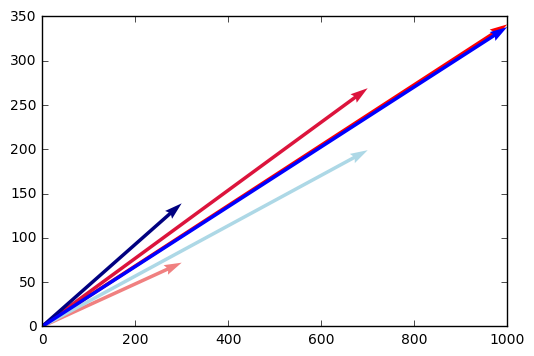

In [50]:
V = np.array([[300,72],[700,269],[1000,341],[700,199],[300,139],[1000,338]])
origin = np.array([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]])
plt.quiver(origin[:,0], origin[:,1], V[:,0], V[:,1], color=['lightcoral','crimson','r','lightblue','navy','b'],angles='xy', scale_units='xy', scale=1)
plt.axis([0, 1000, 0, 350]) 
plt.show()

I would argue that Boris is the better pancake flipper. Boris's right hand is dominant since
his righthand average (0.46) is far better than his lefthand average (0.28). Yet Boris took 
70% of his flips with his nondominant left hand. On the other hand, Arielle's right hand is
dominant since her righthand average (0.38) is better than her lefthand average (0.24), yet
she took 70% of her flips with her dominant hand. Had both players taken all their flips 
with their dominant hand, it is very likely that Boris would have had the higher average.

## Part 2: Identifying Popular Restaurants from check-ins (10 minutes)

A restaurant app has a set of check-ins for restaurants in London, UK and is trying to determine which restaurant is the most popular. They have data in the form of a row-oriented JSON hash with keys: `user_id, timestamp, place_id, postal_code`.

Using the data in `part2.json`, identify the **most popular** place in each zipcode. Explain your method and your reasoning.


In [67]:
# read the entire file into a python array
with open('/home/seasnake/Desktop/Factual_Code_Test/coding_exercise_data/part2.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df2 = pd.read_json(data_json_str)

In [68]:
# printing the shape and first five rows of the dataframe
print df2.shape
df2.head()

(45058, 4)


,place_id,postal_code,timestamp,user_id
0,fe2958af-c764-4534-9b68-40e44b77e162,SW15,2018-05-22 03:08:06,f2ada356-3789-4ddb-866f-0e00f3387454
1,f540d154-78d8-4f6a-a07b-ba1082bc94d6,SW18,2018-05-21 03:48:33,3126bb24-0547-4517-bcf8-81f4944832c5
2,b51746ef-a031-4eef-9a37-836b478c9f11,E2,2018-04-23 02:48:06,5df094de-7236-4e06-9e1a-7aeea1910d08
3,b51746ef-a031-4eef-9a37-836b478c9f11,E2,2018-04-23 03:08:46,5df094de-7236-4e06-9e1a-7aeea1910d08
4,39366f8b-ac58-4c4a-9a0f-10121e4f54d3,E2,2018-05-21 04:10:19,08629da4-92e8-434c-932f-5f3b6aa3714c


In [252]:
# There are no duplicate rows.
df2_copy = df2.copy()
df2_copy.drop_duplicates(keep=False,inplace=True) 
print df2_copy.shape  

(45048, 4)


In [257]:
# For each of the five postal codes, the restaurant with the most check-ins is listed below.
# We first group by postal code and count the number of times each place_id occurs.
# For each postal code, we find the index of the place_id with the maximum count. 
df2_copy2 = df2_copy.copy()
df2_copy2 = df2_copy2.groupby('postal_code')['place_id'].value_counts().reset_index(name="count")
idx2 = df2_copy2.groupby(['postal_code'])['count'].transform(max) == df2_copy2['count']
df2_copy2[idx2]

,postal_code,place_id,count
0,E2,b51746ef-a031-4eef-9a37-836b478c9f11,3180
12,E4,f2f57264-ce10-43d7-a336-0d995dfb02e8,4642
16,SW15,fe2958af-c764-4534-9b68-40e44b77e162,5724
22,SW18,f540d154-78d8-4f6a-a07b-ba1082bc94d6,1480
37,W6,63c97a8b-5d73-4f6e-bb5a-ab8a3cc6e990,1649


In [255]:
# For each of the five postal codes, the restaurant with the most unique visitors 
# is listed below. 
# We group by postal code and place id, and count the number of unique users that visited
# For each postal code, we find the index of the place id with the maximum unique user count.
df2_copy3 = df2_copy.copy()
df2_copy3 = df2_copy3.groupby(['postal_code', 'place_id'])['user_id'].nunique().reset_index(name="count_unique_visitors")
idx3 = df2_copy3.groupby(['postal_code'])['count_unique_visitors'].transform(max) == df2_copy3['count_unique_visitors']
df2_copy3[idx3]

,postal_code,place_id,count_unique_visitors
9,E2,b51746ef-a031-4eef-9a37-836b478c9f11,547
15,E4,f2f57264-ce10-43d7-a336-0d995dfb02e8,591
21,SW15,fe2958af-c764-4534-9b68-40e44b77e162,628
36,SW18,f540d154-78d8-4f6a-a07b-ba1082bc94d6,412
40,W6,63c97a8b-5d73-4f6e-bb5a-ab8a3cc6e990,430


It is unclear if a restaurant's popularity should be measured by its number of check-ins or 
by its number of unique visitors. On the one hand, repeat check-ins indicate happy customers. 
On the other hand, many unique visitors indicates a larger customer base.

## Part 3: Identifying Popular Restaurants from Tagged Photos (25 minutes)

A photo sharing app has a set of photographs tagged to restaurants in London, UK and is trying to determine which are the most popular restaurants in each postal code. The app maker is worried that there may be some skews, biases, and fraud in their data, and has asked you to investigate. Their data, in `part3.json` has the same schema as the data in `part2.json`. 



**Identify what you consider the most popular places, and note any issues with the data. Explain your reasoning.**

In [94]:
# read the entire file into a python array
with open('/home/seasnake/Desktop/Factual_Code_Test/coding_exercise_data/part3.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df3 = pd.read_json(data_json_str)

In [95]:
# print shape and first five rows of dataframe
print df3.shape
df3.head()

(268446, 4)


,place_id,postal_code,timestamp,user_id
0,cc4e591f-55d5-458e-a792-bbd78abd7791,W11,1526781194,7533a324-baf6-4ac8-88da-5e6946f78901
1,0f1aa959-dcae-4e5d-bebe-6e8c32d12b50,W11,1522233352,a0221733-4c57-40f9-bffe-afc917ebf1e8
2,0f1aa959-dcae-4e5d-bebe-6e8c32d12b50,W11,1522240001,a0221733-4c57-40f9-bffe-afc917ebf1e8
3,259afbe4-5b34-4d5d-8997-7df0a7b4e4a6,SW14,1521689291,8776aae1-205d-492d-8357-60b06cbce7c9
4,259afbe4-5b34-4d5d-8997-7df0a7b4e4a6,SW14,1521686717,8776aae1-205d-492d-8357-60b06cbce7c9


In [230]:
# Drop duplicate rows, of which there are many. 
# The high number of duplicate rows indicates fraud.
df3_copy = df3.copy()
df3_copy.drop_duplicates(keep=False,inplace=True) 
print df3_copy.shape  

(153031, 4)


In [228]:
# For each of the five postal codes, the restaurant with the most unique visitors 
# is listed below. 
# We group by postal code and place id, and count the number of unique users that visited
# For each postal code, we find the index of the place id with the maximum unique user count.
df3_copy = df3_copy.groupby(['postal_code', 'place_id'])['user_id'].nunique().reset_index(name="count_unique_visitors")
idx3 = df3_copy.groupby(['postal_code'])['count_unique_visitors'].transform(max) == df3_copy['count_unique_visitors']
df3_copy[idx3]

,postal_code,place_id,count_unique_visitors
2,NW5,e4074710-967d-42c7-813c-23f16e6dda0d,47
5,SE22,a33cbc9b-8fe3-4984-b6be-de67ea855f81,1393
36,SW14,990af278-006c-419c-abc1-6efa45c60f38,589
78,SW15,a336dff1-5982-49a6-a70f-8abb47714d7f,631
88,SW4,0cd46109-3647-4e76-aad4-e7e19e72172b,1363
105,W11,c9973243-9658-4dd2-8f0e-c1146ac79f3f,861
110,W8,96a5b372-590a-4ec3-80ce-7350eaa690ac,48


Since we had many duplicate rows, this indicates that the data could be corrupted by
many rapid check-ins. For this reason, we measure a restaurant's popularity by its number
of unique visitors only. Without more information, we assume that each check-in is valid
and that there are no fake zombie users in the dataset.

## Part 4: Machine Learning on Genetic Data (25 mins)

A genetics lab has asked you to build a predictive model of mouse length and weight based on genetic variation.

The genetic data is stored in `part4.csv` with each subject as a row, and each genetic variant as a column. The values indicate the number of copies of the genetic variant they have. Since mice have (in general) 2 copies of each of their chromosomes, the numbers will all be 0, 1, or 2.

Each subject's length (in mm) and weight (in grams) is in the columns labeled `length` and `weight`. 

Study the input and output variables, and determine what drives length and weight.

In [96]:
# reading the csv file into a pandas dataframe
df4 = pd.read_csv('/home/seasnake/Desktop/Factual_Code_Test/coding_exercise_data/part4.csv')

In [97]:
# printing the shape and the first five rows of the dataframe
print df4.shape
df4.head()

(3000, 5003)


,Unnamed: 0,VARIANT_0000,VARIANT_0001,VARIANT_0002,VARIANT_0003,VARIANT_0004,VARIANT_0005,VARIANT_0006,VARIANT_0007,VARIANT_0008,VARIANT_0009,VARIANT_0010,VARIANT_0011,VARIANT_0012,VARIANT_0013,VARIANT_0014,VARIANT_0015,VARIANT_0016,VARIANT_0017,VARIANT_0018,VARIANT_0019,VARIANT_0020,VARIANT_0021,VARIANT_0022,VARIANT_0023,VARIANT_0024,VARIANT_0025,VARIANT_0026,VARIANT_0027,VARIANT_0028,VARIANT_0029,VARIANT_0030,VARIANT_0031,VARIANT_0032,VARIANT_0033,VARIANT_0034,VARIANT_0035,VARIANT_0036,VARIANT_0037,VARIANT_0038,VARIANT_0039,VARIANT_0040,VARIANT_0041,VARIANT_0042,VARIANT_0043,VARIANT_0044,VARIANT_0045,VARIANT_0046,VARIANT_0047,VARIANT_0048,VARIANT_0049,VARIANT_0050,VARIANT_0051,VARIANT_0052,VARIANT_0053,VARIANT_0054,VARIANT_0055,VARIANT_0056,VARIANT_0057,VARIANT_0058,VARIANT_0059,VARIANT_0060,VARIANT_0061,VARIANT_0062,VARIANT_0063,VARIANT_0064,VARIANT_0065,VARIANT_0066,VARIANT_0067,VARIANT_0068,VARIANT_0069,VARIANT_0070,VARIANT_0071,VARIANT_0072,VARIANT_0073,VARIANT_0074,VARIANT_0075,VARIANT_0076,VARIANT_0077,VARIANT_0078,VARIANT_0079,VARIANT_0080,VARIANT_0081,VARIANT_0082,VARIANT_0083,VARIANT_0084,VARIANT_0085,VARIANT_0086,VARIANT_0087,VARIANT_0088,VARIANT_0089,VARIANT_0090,VARIANT_0091,VARIANT_0092,VARIANT_0093,VARIANT_0094,VARIANT_0095,VARIANT_0096,VARIANT_0097,VARIANT_0098,VARIANT_0099,VARIANT_0100,VARIANT_0101,VARIANT_0102,VARIANT_0103,VARIANT_0104,VARIANT_0105,VARIANT_0106,VARIANT_0107,VARIANT_0108,VARIANT_0109,VARIANT_0110,VARIANT_0111,VARIANT_0112,VARIANT_0113,VARIANT_0114,VARIANT_0115,VARIANT_0116,VARIANT_0117,VARIANT_0118,VARIANT_0119,VARIANT_0120,VARIANT_0121,VARIANT_0122,VARIANT_0123,VARIANT_0124,VARIANT_0125,VARIANT_0126,VARIANT_0127,VARIANT_0128,VARIANT_0129,VARIANT_0130,VARIANT_0131,VARIANT_0132,VARIANT_0133,VARIANT_0134,VARIANT_0135,VARIANT_0136,VARIANT_0137,VARIANT_0138,VARIANT_0139,VARIANT_0140,VARIANT_0141,VARIANT_0142,VARIANT_0143,VARIANT_0144,VARIANT_0145,VARIANT_0146,VARIANT_0147,VARIANT_0148,VARIANT_0149,VARIANT_0150,VARIANT_0151,VARIANT_0152,VARIANT_0153,VARIANT_0154,VARIANT_0155,VARIANT_0156,VARIANT_0157,VARIANT_0158,VARIANT_0159,VARIANT_0160,VARIANT_0161,VARIANT_0162,VARIANT_0163,VARIANT_0164,VARIANT_0165,VARIANT_0166,VARIANT_0167,VARIANT_0168,VARIANT_0169,VARIANT_0170,VARIANT_0171,VARIANT_0172,VARIANT_0173,VARIANT_0174,VARIANT_0175,VARIANT_0176,VARIANT_0177,VARIANT_0178,VARIANT_0179,VARIANT_0180,VARIANT_0181,VARIANT_0182,VARIANT_0183,VARIANT_0184,VARIANT_0185,VARIANT_0186,VARIANT_0187,VARIANT_0188,VARIANT_0189,VARIANT_0190,VARIANT_0191,VARIANT_0192,VARIANT_0193,VARIANT_0194,VARIANT_0195,VARIANT_0196,VARIANT_0197,VARIANT_0198,VARIANT_0199,VARIANT_0200,VARIANT_0201,VARIANT_0202,VARIANT_0203,VARIANT_0204,VARIANT_0205,VARIANT_0206,VARIANT_0207,VARIANT_0208,VARIANT_0209,VARIANT_0210,VARIANT_0211,VARIANT_0212,VARIANT_0213,VARIANT_0214,VARIANT_0215,VARIANT_0216,VARIANT_0217,VARIANT_0218,VARIANT_0219,VARIANT_0220,VARIANT_0221,VARIANT_0222,VARIANT_0223,VARIANT_0224,VARIANT_0225,VARIANT_0226,VARIANT_0227,VARIANT_0228,VARIANT_0229,VARIANT_0230,VARIANT_0231,VARIANT_0232,VARIANT_0233,VARIANT_0234,VARIANT_0235,VARIANT_0236,VARIANT_0237,VARIANT_0238,VARIANT_0239,VARIANT_0240,VARIANT_0241,VARIANT_0242,VARIANT_0243,VARIANT_0244,VARIANT_0245,VARIANT_0246,VARIANT_0247,VARIANT_0248,...,VARIANT_4752,VARIANT_4753,VARIANT_4754,VARIANT_4755,VARIANT_4756,VARIANT_4757,VARIANT_4758,VARIANT_4759,VARIANT_4760,VARIANT_4761,VARIANT_4762,VARIANT_4763,VARIANT_4764,VARIANT_4765,VARIANT_4766,VARIANT_4767,VARIANT_4768,VARIANT_4769,VARIANT_4770,VARIANT_4771,VARIANT_4772,VARIANT_4773,VARIANT_4774,VARIANT_4775,VARIANT_4776,VARIANT_4777,VARIANT_4778,VARIANT_4779,VARIANT_4780,VARIANT_4781,VARIANT_4782,VARIANT_4783,VARIANT_4784,VARIANT_4785,VARIANT_4786,VARIANT_4787,VARIANT_4788,VARIANT_4789,VARIANT_4790,VARIANT_4791,VARIANT_4792,VARIANT_4793,VARIANT_4794,VARIANT_4795,VARIANT_4796,VARIANT_4797,VARIANT_4798,VARIANT_4799,VARIANT_4800,VARIANT_4801,VARIANT_4802,VARIANT_4803,VARIANT_4804,VARIANT_4805,VARIANT_4806,VARIANT_4807,VARIANT_4808,VARIAN

In [100]:
# Returns a numpy array representation of the dataframe
df4_arr = df4.values

In [103]:
# Feature array
X = df4_arr[:,1:-2]
print X.shape

(3000, 5000)


In [105]:
# Target length
Y_l = df4_arr[:,-2]

In [106]:
# Target weight
Y_w = df4_arr[:,-1]

In [114]:
# Fit a random forest regressor to the feature matrix and target length variable 
# and argsort the feature importances
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, Y_l)
rf_idx = np.argsort(rf.feature_importances_)

In [115]:
# Print the ten most important random forest regressor features for length along 
# with their feature importance scores.
for i in range(1,11):
    print rf_idx[-i], rf.feature_importances_[rf_idx[-i]]

3914 0.171747507378
1945 0.161104069728
4101 0.0768271924254
25 0.0471908972183
3692 0.0374463698194
4880 0.0341590823285
4686 0.0255177628357
1146 0.0224104611528
4387 0.018487134536
4294 0.0175812654224


In [116]:
# Compute the mutual information between each feature and the length target variable
# Argsort the vector of mutual information
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, Y_l)
mi_idx = np.argsort(mi)

In [117]:
# Print the ten features having the highest mutual information with the length
# target variable along with the mutual information value
for i in range(1,11):
    print mi_idx[-i], mi[mi_idx[-i]]

1945 0.104929091656
3914 0.0962812482163
4638 0.0790787747671
4526 0.0740925327995
4686 0.0736931527305
25 0.0721854500829
4294 0.0715492354391
4455 0.0711737344962
1051 0.0700390191059
1146 0.0695881540808


In [118]:
# Fit a random forest regressor to the feature matrix and target weight variable 
# and argsort the feature importances
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, Y_w)
rf_idx_w = np.argsort(rf.feature_importances_)

In [119]:
# Print the ten most important random forest regressor features for weight along 
# with their feature importance scores.
for i in range(1,11):
    print rf_idx_w[-i], rf.feature_importances_[rf_idx_w[-i]]

3914 0.0657173669697
3883 0.0510296051511
1945 0.0263336808087
4838 0.0105817149337
4381 0.0100270265844
1281 0.00925631531393
1774 0.00910002476948
3692 0.00820784816991
1778 0.00810163611525
4136 0.0054534440928


In [120]:
# Compute the mutual information between each feature and the weight target variable
# Argsort the vector of mutual information
from sklearn.feature_selection import mutual_info_regression
mi_w = mutual_info_regression(X, Y_w)
mi_idx_w = np.argsort(mi_w)

In [121]:
# Print the ten features having the highest mutual information with the weight
# target variable along with the mutual information value
for i in range(1,11):
    print mi_idx_w[-i], mi_w[mi_idx_w[-i]]

3899 0.0604596564687
3883 0.0580461679895
3744 0.055465195657
3659 0.0552589697622
1302 0.0549413417197
1753 0.0547621405728
4571 0.0541080834413
4381 0.0538300064361
3317 0.0536971753636
3750 0.0530967266116


In [132]:
# These features were chosen as predictive of length by both 
# random forest regression and mutual information
length_predictors = np.intersect1d(rf_idx[-10:], mi_idx[-10:])
print length_predictors

[  25 1146 1945 3914 4294 4686]


In [133]:
# These features were chosen as predictive of weight by both
# random forest regression and mutual information
weight_predictors = np.intersect1d(rf_idx_w[-10:], mi_idx_w[-10:])
print weight_predictors

[3883 4381]


In [138]:
# These features were chosen as predictive by random forest
# regression for both length and weight
rf_predictors = np.intersect1d(rf_idx[-10:], rf_idx_w[-10:])
print rf_predictors

[1945 3692 3914]


In [139]:
# These features were chosen as predictive by mutual information
# for both length and weight
mi_predictors = np.intersect1d(mi_idx[-10:], mi_idx_w[-10:])
print mi_predictors

[]


In [140]:
# These features were chosen as predictive by random forest
# regression for length and by mutual information for weight
rf_mi_w_predictor = np.intersect1d(rf_idx[-10:], mi_idx_w[-10:])
print rf_mi_w_predictor

[]


In [141]:
# These features were chosen as predictive by random forest
# regression for weight and by mutual information for length
rf_w_mi_predictor = np.intersect1d(rf_idx_w[-10:], mi_idx[-10:])
print rf_w_mi_predictor

[1945 3914]


The two features most predictive of both length and weight are 1945 and 3914.

## Part 5: Short Answer (10 minutes total)

Answer each of the following with a few sentences or a bulleted list.

#### 1. What tools have you found particularly interesting in software development?

For C++, I use gdb and valgrind.

#### 2. What machine learning algorithms have you been using recently in your work/study? How have you been using them?

I took a one-year machine learning sequence at UCSD. The first quarter focused on generative 
methods, which means that we assume we have some knowledge of the distribution that the data
comes from. Topics included Bayesian decision theory and estimation, Gaussian classifiers, 
maximum likelihood estimation, and expectation maximization.

The second quarter focused on discriminant methods, which means we were trying to separate
datapoints with linear hyperplanes. Topics included PCA, boosting, and support vector machines.

The third quarter focused on deep learning. Topics included backpropagation, gradient
descent, and regularization. 

I also took the Coursera Deep Learning specialization, where we built projects using
convolutional neural networks and LSTMs.

#### 3. _Approximately_ what is the chance that heads will come up more than 55 times in 100 flips of a fair coin? 
<font color=red>**Do not write code or use a calculator for this question.**</font>

Let $X$ be the number of heads that come up in 100 coin tosses. The random variable $X$ is 
binomially distributed with parameters $n=100$ and $p=0.5$. By linearity of expectation,
$E(X) = 50$ and the standard deviation $\sigma(X)$ is $\sqrt{100(1/2)(1/2)} = 5$. Let $Z$ be 
normally distributed with mean 0 and standard deviation 1. By the normal approximation to the 
binomial distribution,

$$P(X > 55) \approx P \left(Z > \frac{55-50}{5} \right) = P(Z > 1) \approx 0.15$$. 

## Part 6: Tell us something (10 minutes)

Share a link to some work you're proud of, and explain it in a short paragraph.  Links to code are a big plus!

As a machine learning intern at Jet Propulsion Laboratory, I design software for the Department of Homeland Security’s Next Generation First Responder Program. I am building an optical character recognition (OCR) system for medicine bottle labels. I developed a novel way to ensemble OCR outputs that achieves 87% character accuracy and outperforms Google’s Document Text Detection API on the dot matrix fonts that are used to print lot numbers and expiration dates. Here is a GitHub link with full code and experiments, https://github.com/ameera3/OCR_Expiration_Date.

## How was the coding exercise? (Optional)

We'd love to hear your feedback, completely anonymously at this [Google Form](https://goo.gl/forms/0Aacnke3etOTtbb93).